# Cluster Algorithms

Comparing cluster algorithms with spotify music data.

### Project Outline

1. Data Exploration
2. Data Preprocessing
3. Clustering Algorithms
3.1 K-Means
3.2 DBSCAN
3.3 Agglomerative Clustering
3.4 Gaussian Mixture Model
3.5 Spectral Clustering
3.6 Affinity Propagation
3.7 Birch
3.8 Mean Shift
3.9 OPTICS
3.10 HDBSCAN

4. Evaluation
5. Conclusion

In [1]:
# Importing libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
# IPython magic

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## 1. Data Exploration

In [3]:
df = pd.read_csv('tracklist.csv')
df.head()

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,...,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key
0,2023-03-11T21:13:08Z,7jnaAu7P745QnBBHm3RtSU,Rainforest,54,spotify:track:7jnaAu7P745QnBBHm3RtSU,Noname,Rainforest,2021-02-26,162436,162436.0,...,0.544,0.010,0.3750,-10.925,0.3710,92.066,4.0,0.676,0.0,6.0
1,2023-03-10T12:43:35Z,6EmZIBiuAWLgBD34nA0NRi,Sweet Harmony - Minoas Cirillo Remix,17,spotify:track:6EmZIBiuAWLgBD34nA0NRi,David Hasert,Sweet Harmony (Remixed),2023-03-10,468664,468664.0,...,0.883,0.837,0.1120,-7.843,0.0374,126.010,4.0,0.337,0.0,7.0
2,2023-03-01T06:42:16Z,60svQHvhQQNdgIdJQbteFy,Every Single Day,22,spotify:track:60svQHvhQQNdgIdJQbteFy,Heritage Listed,Every Single Day,2023-01-28,311612,311612.0,...,0.682,0.815,0.0875,-7.067,0.0413,124.005,4.0,0.639,0.0,1.0
3,2023-02-19T07:29:39Z,3Q5q3wmVSyZ5P9zEmF5XDk,Think About Things - Hot Chip Remix Edit,33,spotify:track:3Q5q3wmVSyZ5P9zEmF5XDk,Daði Freyr,Think About Things (Hot Chip Remix),2020-05-14,219235,219235.0,...,0.729,0.223,0.2850,-7.778,0.0478,118.003,4.0,0.715,0.0,3.0
4,2023-02-19T07:28:11Z,0qSnUYuOaV7nxnrtCyIFYR,Primavera - Anna Prior Remix,28,spotify:track:0qSnUYuOaV7nxnrtCyIFYR,PPJ,Primavera - Remix Drop I,2021-01-08,352000,352000.0,...,0.822,0.761,0.1010,-10.796,0.0526,120.011,4.0,0.545,0.0,9.0


## 2. Data Preprocessing

In [4]:
# Preprocessing for k-means
# Select columns to be used
df_cl = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']]

# Fill zeros values with 0.1
df_cl = df_cl.replace(0, 0.1)

# Replace NaN values with mean
df_cl = df_cl.fillna(df_cl.mean())

In [8]:
# Log transformation
df_log = np.log(df_cl)
print(df_log.head(3))

   acousticness  danceability    energy  instrumentalness  liveness   
0     -1.350927     -0.636767 -0.608806         -4.605170 -0.980829  \
1     -4.141436     -0.424648 -0.124430         -0.177931 -2.189256   
2     -2.861201     -0.166055 -0.382726         -0.204567 -2.436116   

   speechiness     tempo   valence  
0    -0.991553  4.522506 -0.391562  
1    -3.286085  4.836361 -1.087672  
2    -3.186893  4.820322 -0.447851  


In [9]:
from sklearn.preprocessing import StandardScaler

# Standardization
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_cl)

print(df_scaled[:3])

[[ 0.71796461 -2.18315763 -0.68270653 -2.01635396  1.69673803  5.01539377
  -1.74228632  1.03851761]
 [-0.51373396 -0.92407461  1.27793209  0.54080772 -0.24825282 -0.58616867
   0.27949816 -0.23627075]
 [-0.304482    1.01994955  0.11542955  0.47278165 -0.42944018 -0.52068278
   0.16007564  0.89938141]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min Max Scaling
scaler = MinMaxScaler()
df_scaled_positive = scaler.fit_transform(df_log)

print(df_scaled_positive[:3])

In [11]:
# Elbow method
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

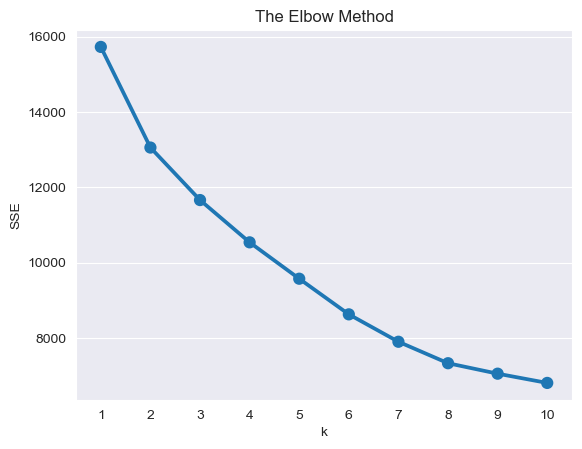

In [12]:
    plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.show()

In [13]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 4


## 3. Clustering Algorithms

### 3.1 K-Means

In [14]:
model = KMeans(n_clusters=10, random_state=42)
model.fit(df_scaled)
df = df.assign(ClusterLabel= model.labels_)

/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Rename CLusterLabel to KMeans
df = df.rename(columns={'ClusterLabel': 'KMeans'})
df.groupby("KMeans")[["valence", "acousticness" ]].median()

,valence,acousticness
KMeans,,
0,0.6470,0.00851
1,0.2235,0.01920
2,0.2850,0.83100
3,0.3320,0.48300
4,0.6190,0.16800
5,0.1770,0.00554
6,0.7570,0.05045
7,0.3840,0.01600
8,0.5890,0.11600


In [16]:
# Cluster Label to categorical
df['KMeans'] = df['KMeans'].astype('category')

In [ ]:
fig = px.scatter(
    data_frame=df,
    x = "valence",
    y= "acousticness",
    title = "Spotify Music Data",
    color = "KMeans",
    height=500
)
fig.show()

In [18]:
# Scatter matrix without upper half
fig = go.Figure(
    data=go.Splom(
        dimensions=[dict(label='valence', values=df['valence']),
                    dict(label='acousticness', values=df['acousticness']),
                    dict(label='danceability', values=df['danceability']),
                    dict(label='energy', values=df['energy']),
                    dict(label='instrumentalness', values=df['instrumentalness']),
                    dict(label='liveness', values=df['liveness']),
                    dict(label='speechiness', values=df['speechiness']),
                    dict(label='tempo', values=df['tempo'])],
        text=df['KMeans'],
        showupperhalf=False,
        diagonal=dict(visible=False),
        marker=dict(
            color=df['KMeans'],
            showscale=True,
            colorscale='Viridis',
            line_color='white',
            line_width=0.5,
            size=5,
            opacity=0.6
        )
    )
)

fig.update_layout(
    title='Spotify Music Data',
    showlegend=True,
    width=1000,
    height=1000,
    dragmode='select',
    hovermode='closest',

)

fig.show()

In [19]:
# Bar plot for count of each cluster
fig = px.histogram(
    data_frame=df,
    x = "KMeans",
    title = "Spotify Music Data",
    color = "KMeans",
    height=500
)
fig.show()

### 3.2 DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# create DBSCAN object and set hyperparameters
dbscan = DBSCAN(eps=0.7, min_samples=10)

# fit the model on the data
dbscan.fit(df_scaled)

# get the cluster assignments for each data point
labels = dbscan.labels_

# add the cluster labels to the DataFrame
df['DBSCAN'] = labels

In [23]:
df.head(10)

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,...,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key,KMeans,DBSCAN
0,2023-03-11T21:13:08Z,7jnaAu7P745QnBBHm3RtSU,Rainforest,54,spotify:track:7jnaAu7P745QnBBHm3RtSU,Noname,Rainforest,2021-02-26,162436,162436.0,...,0.3750,-10.925,0.3710,92.066,4.0,0.676,0.0,6.0,8,-1
1,2023-03-10T12:43:35Z,6EmZIBiuAWLgBD34nA0NRi,Sweet Harmony - Minoas Cirillo Remix,17,spotify:track:6EmZIBiuAWLgBD34nA0NRi,David Hasert,Sweet Harmony (Remixed),2023-03-10,468664,468664.0,...,0.1120,-7.843,0.0374,126.010,4.0,0.337,0.0,7.0,5,0
2,2023-03-01T06:42:16Z,60svQHvhQQNdgIdJQbteFy,Every Single Day,22,spotify:track:60svQHvhQQNdgIdJQbteFy,Heritage Listed,Every Single Day,2023-01-28,311612,311612.0,...,0.0875,-7.067,0.0413,124.005,4.0,0.639,0.0,1.0,0,0
3,2023-02-19T07:29:39Z,3Q5q3wmVSyZ5P9zEmF5XDk,Think About Things - Hot Chip Remix Edit,33,spotify:track:3Q5q3wmVSyZ5P9zEmF5XDk,Daði Freyr,Think About Things (Hot Chip Remix),2020-05-14,219235,219235.0,...,0.2850,-7.778,0.0478,118.003,4.0,0.715,0.0,3.0,6,-1
4,2023-02-19T07:28:11Z,0qSnUYuOaV7nxnrtCyIFYR,Primavera - Anna Prior Remix,28,spotify:track:0qSnUYuOaV7nxnrtCyIFYR,PPJ,Primavera - Remix Drop I,2021-01-08,352000,352000.0,...,0.1010,-10.796,0.0526,120.011,4.0,0.545,0.0,9.0,0,0
5,2023-02-18T21:39:05Z,2q4IaFpqebD6pMLvRrclvO,Voodoo Babe,43,spotify:track:2q4IaFpqebD6pMLvRrclvO,Never Dull,Voodoo Babe,2020-05-08,249002,249002.0,...,0.0728,-8.156,0.0697,122.988,4.0,0.666,0.0,5.0,6,-1
6,2023-02-18T21:38:33Z,5xbKD51JPTqbqLjWnvmnmF,Do you Feel Like I do?,41,spotify:track:5xbKD51JPTqbqLjWnvmnmF,Another Chemical Love Story,Do you Feel Like I do?,2021-10-29,398095,398095.0,...,0.1130,-5.117,0.1220,126.026,4.0,0.623,0.0,10.0,6,-1
7,2023-02-18T21:37:55Z,2wHeYDrniYngp3did3McYD,Voodoo? - Lazywax Remix,44,spotify:track:2wHeYDrniYngp3did3McYD,L'Impératrice,Voodoo? (Lazywax Remix),2020-11-13,386443,386443.0,...,0.0443,-8.527,0.0853,117.004,4.0,0.881,0.0,6.0,6,-1
8,2023-02-18T21:37:30Z,4G8ZQfRPoSrnlp69UY2WE6,Sadcited,27,spotify:track:4G8ZQfRPoSrnlp69UY2WE6,Andrew Meller,Sadcited,2020-10-30,211200,211200.0,...,0.0494,-6.908,0.0637,124.987,4.0,0.549,1.0,2.0,0,0
9,2023-02-18T21:37:11Z,0T7hjHy7NiXWjGTeoPSEhH,Turn Around (Hey What's Wrong with You) - Robo...,34,spotify:track:0T7hjHy7NiXWjGTeoPSEhH,Phats & Small,Turn Around (Hey What's Wrong with You) [Remixes],2020-12-04,197243,197243.0,...,0.0545,-10.453,0.0465,128.004,4.0,0.721,0.0,1.0,0,-1


In [24]:
# Scatter matrix without upper half
fig = go.Figure(
    data=go.Splom(
        dimensions=[dict(label='valence', values=df['valence']),
                    dict(label='acousticness', values=df['acousticness']),
                    dict(label='danceability', values=df['danceability']),
                    dict(label='energy', values=df['energy']),
                    dict(label='instrumentalness', values=df['instrumentalness']),
                    dict(label='liveness', values=df['liveness']),
                    dict(label='speechiness', values=df['speechiness']),
                    dict(label='tempo', values=df['tempo'])],
        text=df['DBSCAN'],
        showupperhalf=False,
        diagonal=dict(visible=False),
        marker=dict(
            color=df['DBSCAN'],
            showscale=True,
            colorscale='Viridis',
            line_color='white',
            line_width=0.5,
            size=5,
            opacity=0.6
        )
    )
)

fig.update_layout(
    title='Spotify Music Data',
    showlegend=True,
    width=1000,
    height=1000,
    dragmode='select',
    hovermode='closest',

)

fig.show()

### 3.3 Agglomerative Clustering

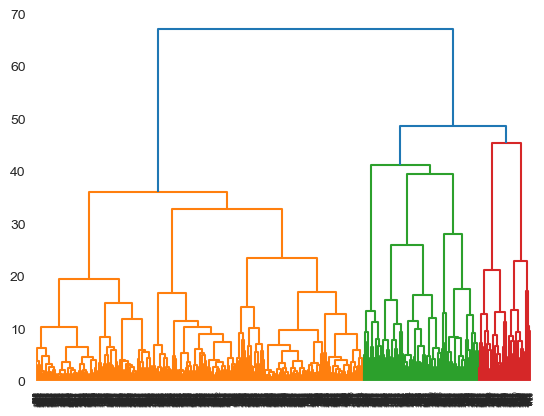

In [25]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

In [26]:
# create Agglomerative Clustering object and set hyperparameters
agg = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')

# fit the model on the data
agg.fit(df_scaled)

# get the cluster assignments for each data point
labels = agg.labels_

# add the cluster labels to the DataFrame
df['Agglomerative'] = labels

/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [27]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.4 Gaussian Mixture Model

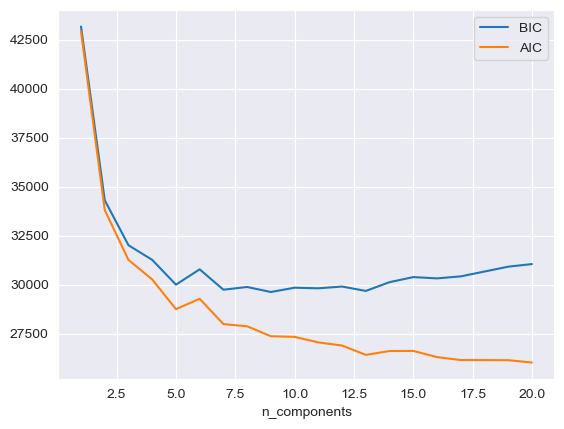

In [28]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_scaled) for n in n_components]

plt.plot(n_components, [m.bic(df_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [29]:
# create Gaussian Mixture Model object and set hyperparameters
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)

# fit the model on the data
gmm.fit(df_scaled)

# get the cluster assignments for each data point
labels = gmm.predict(df_scaled)

# add the cluster labels to the DataFrame
df['GaussianMM'] = labels

In [30]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.5 Spectral Clustering

In [32]:
from sklearn.cluster import SpectralClustering

# create Spectral Clustering object and set hyperparameters
sc = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', n_neighbors=10)

# fit the model on the data
sc.fit(df_scaled)

# get the cluster assignments for each data point
labels = sc.labels_

# add the cluster labels to the DataFrame
df['Spectral'] = labels


In [33]:
df.to_csv('spotify.csv')
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.6 Affinity Propagation

In [34]:
from sklearn.cluster import AffinityPropagation

# create Affinity Propagation object and set hyperparameters
af = AffinityPropagation(preference=-50)

# fit the model on the data
af.fit(df_scaled)

# get the cluster assignments for each data point
labels = af.labels_

# add the cluster labels to the DataFrame
df['Affinity'] = labels


In [35]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.7 Birch

In [36]:
from sklearn.cluster import Birch

# create Birch object and set hyperparameters
birch = Birch(n_clusters=10)

# fit the model on the data
birch.fit(df_scaled)

# get the cluster assignments for each data point
labels = birch.labels_

# add the cluster labels to the DataFrame
df['Birch'] = labels


In [37]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.8 Mean Shift

In [38]:
from sklearn.cluster import MeanShift

# create Mean Shift object and set hyperparameters
ms = MeanShift(bandwidth=2)

# fit the model on the data
ms.fit(df_scaled)

# get the cluster assignments for each data point
labels = ms.labels_

# add the cluster labels to the DataFrame
df['MeanShift'] = labels


In [39]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.9 OPTICS

In [40]:
import sklearn.cluster as cluster

# create OPTICS object and set hyperparameters
optics = cluster.OPTICS(min_samples=10, xi=.05, min_cluster_size=.05, metric='euclidean')

# fit the model on the data
optics.fit(df_scaled)

# get the cluster assignments for each data point
labels = optics.labels_

# add the cluster labels to the DataFrame
df['OPTICS'] = labels


In [41]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.10 HDBSCAN

In [42]:
import hdbscan

# create HDBSCAN object and set hyperparameters
hdbscan = hdbscan.HDBSCAN(min_cluster_size=10)

# fit the model on the data
hdbscan.fit(df_scaled)

# get the cluster assignments for each data point
labels = hdbscan.labels_

# add the cluster labels to the DataFrame
df['HDBSCAN'] = labels


In [43]:
df.to_csv('spotify.csv')
print(df.head())

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   

                                       name  popularity   
0                                Rainforest          54  \
1      Sweet Harmony - Minoas Cirillo Remix          17   
2                          Every Single Day          22   
3  Think About Things - Hot Chip Remix Edit          33   
4              Primavera - Anna Prior Remix          28   

                                    uri           artist   
0  spotify:track:7jnaAu7P745QnBBHm3RtSU           Noname  \
1  spotify:track:6EmZIBiuAWLgBD34nA0NRi     David Hasert   
2  spotify:track:60svQHvhQQNdgIdJQbteFy  Heritage Listed   
3  spotify:track:3Q5q3wmVSyZ5P9zEmF5XDk       Daði Freyr   
4  spotify:track:0qSnUYuOaV7nxnrtCyIFY

### 3.11 Fuzzy C-Means

In [44]:
from skfuzzy.cluster import cmeans

# set hyperparameters
cntr, u, u0, d, jm, p, fpc = cmeans(df_scaled.T, c=10, m=2, error=0.005, maxiter=1000, init=None)

# get the cluster assignments for each data point
labels = np.argmax(u, axis=0)

# add the cluster labels to the DataFrame
df['FuzzyCMeans'] = labels


In [45]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.12 TSNE (T-Distributed Stochastic Neighbor Embedding)

In [46]:
from sklearn.manifold import TSNE

# create TSNE object and set hyperparameters
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, n_iter=1000, random_state=0)

# fit the model on the data
tsne_results = tsne.fit_transform(df_scaled)

# add the cluster labels to the DataFrame
df['TSNE'] = labels


In [47]:
print(df.head(10))


               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.13 Dirichlet Process Gaussian Mixture Model (DPGMM)

In [48]:
from sklearn.mixture import BayesianGaussianMixture

# create DPGMM object and set hyperparameters
dpgmm = BayesianGaussianMixture(n_components=10, covariance_type='full', random_state=0)

# fit the model on the data
dpgmm.fit(df_scaled)

# get the cluster assignments for each data point
labels = dpgmm.predict(df_scaled)

# add the cluster labels to the DataFrame
df['DPGMM'] = labels


/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



In [49]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.14 Agglomerative Information Bottleneck (AIB)

In [50]:
from sklearn.cluster import AgglomerativeClustering

# create AIB object and set hyperparameters
aib = AgglomerativeClustering(n_clusters=10, linkage='average', affinity='manhattan')

# fit the model on the data
aib.fit(df_scaled)

# get the cluster assignments for each data point
labels = aib.labels_

# add the cluster labels to the DataFrame
df['AIB'] = labels

/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [51]:
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

### 3.15 Ward Hierarchical Clustering (WHC)

In [59]:
from sklearn.cluster import AgglomerativeClustering

# create WHC object and set hyperparameters
whc = AgglomerativeClustering(n_clusters=10, linkage='ward', affinity='euclidean')

# fit the model on the data
whc.fit(df_scaled)

# get the cluster assignments for each data point
labels = whc.labels_

# add the cluster labels to the DataFrame
df['WHC'] = labels

/Users/nilsjennissen/opt/miniconda3/envs/spotify/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [60]:
df.to_csv('spotify.csv')
print(df.head(10))

               added_at                      id   
0  2023-03-11T21:13:08Z  7jnaAu7P745QnBBHm3RtSU  \
1  2023-03-10T12:43:35Z  6EmZIBiuAWLgBD34nA0NRi   
2  2023-03-01T06:42:16Z  60svQHvhQQNdgIdJQbteFy   
3  2023-02-19T07:29:39Z  3Q5q3wmVSyZ5P9zEmF5XDk   
4  2023-02-19T07:28:11Z  0qSnUYuOaV7nxnrtCyIFYR   
5  2023-02-18T21:39:05Z  2q4IaFpqebD6pMLvRrclvO   
6  2023-02-18T21:38:33Z  5xbKD51JPTqbqLjWnvmnmF   
7  2023-02-18T21:37:55Z  2wHeYDrniYngp3did3McYD   
8  2023-02-18T21:37:30Z  4G8ZQfRPoSrnlp69UY2WE6   
9  2023-02-18T21:37:11Z  0T7hjHy7NiXWjGTeoPSEhH   

                                                name  popularity   
0                                         Rainforest          54  \
1               Sweet Harmony - Minoas Cirillo Remix          17   
2                                   Every Single Day          22   
3           Think About Things - Hot Chip Remix Edit          33   
4                       Primavera - Anna Prior Remix          28   
5                             

## 4. Evaluation


In [82]:
# Transform all cluster labels to categorical data type
df['KMeans'] = df['KMeans'].astype('category')
df['DBSCAN'] = df['DBSCAN'].astype('category')
df['GaussianMM'] = df['GaussianMM'].astype('category')
df['Spectral'] = df['Spectral'].astype('category')
df['Agglomerative'] = df['Agglomerative'].astype('category')
df['Affinity'] = df['Affinity'].astype('category')
df['Birch'] = df['Birch'].astype('category')
df['MeanShift'] = df['MeanShift'].astype('category')
df['OPTICS'] = df['OPTICS'].astype('category')
df['HDBSCAN'] = df['HDBSCAN'].astype('category')
df['FuzzyCMeans'] = df['FuzzyCMeans'].astype('category')
df['TSNE'] = df['TSNE'].astype('category')
df['DPGMM'] = df['DPGMM'].astype('category')
df['AIB'] = df['AIB'].astype('category')
df['WHC'] = df['WHC'].astype('category')


### Visual inspection of clusters

In [79]:
# Scattermatrix for KMeans with plotly
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_matrix(df, dimensions=["danceability", "energy", "valence", "acousticness"], color="KMeans", height=800, width=2000, hover_data=["name", "artist", "id"])
fig.show()

In [83]:
# Scattermatrix for KMeans with plotly
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_matrix(df, dimensions=["danceability", "energy", "valence", "acousticness"], color="Agglomerative", height=800, width=2000, hover_data=["name", "artist", "id"])
fig.show()

### Sample Comparisson

In [99]:
df = df[['name', 'artist', 'album', 'KMeans', 'DBSCAN', 'GaussianMM', 'Spectral', 'Agglomerative', 'Affinity', 'Birch', 'MeanShift', 'OPTICS', 'HDBSCAN', 'FuzzyCMeans', 'TSNE', 'DPGMM', 'AIB', 'WHC']]
# Filter for first 20 track with cluster label 0
df[df['FuzzyCMeans'] == 8].head(20)



,name,artist,album,KMeans,DBSCAN,GaussianMM,Spectral,Agglomerative,Affinity,Birch,MeanShift,OPTICS,HDBSCAN,FuzzyCMeans,TSNE,DPGMM,AIB,WHC
0,Rainforest,Noname,Rainforest,8,-1,7,5,2,23,2,77,0,-1,8,8,7,2,8
3,Think About Things - Hot Chip Remix Edit,Daði Freyr,Think About Things (Hot Chip Remix),6,-1,3,4,1,1,8,1,0,-1,8,8,3,0,5
5,Voodoo Babe,Never Dull,Voodoo Babe,6,-1,6,4,7,11,8,4,0,-1,8,8,6,0,4
6,Do you Feel Like I do?,Another Chemical Love Story,Do you Feel Like I do?,6,-1,8,4,7,10,8,4,0,-1,8,8,6,0,9
7,Voodoo? - Lazywax Remix,L'Impératrice,Voodoo? (Lazywax Remix),6,-1,6,4,7,11,8,3,0,-1,8,8,6,0,0
13,Love Divine (feat. Phebe Edwards),Riva Starr,Love Divine (feat. Phebe Edwards),6,-1,1,4,7,10,8,0,0,-1,8,8,3,0,4
15,Sometimes,Monkey Safari,Love Will Set U Free,6,-1,6,4,5,10,7,3,0,-1,8,8,6,0,0
16,Your Good Times Are Here,Laurence Guy,Your Good Times Are Here,8,-1,1,5,2,26,2,86,0,-1,8,8,1,0,3
19,Nachts wach (Lila Wolken Bootleg),Miksu / Macloud,Nachts wach,4,-1,8,2,9,4,4,4,0,-1,8,8,4,0,4
20,Ain't Gonna Cry,Alex Preston,Ain't Gonna Cry,6,-1,1,4,7,12,8,2,0,-1,8,8,1,0,3
